# Original Inference

In [9]:
from beads import beads
import numpy as np
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial
import grcwa

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 8 # um
wv_sweep = np.linspace(5, 20, num=100, endpoint=True) + 0.000001

grcwa.set_backend('numpy')

In [ ]:
Rs, Ts, As = beads(wv_sweep, nG=40, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=False, Nx=50, Ny=50, Np=25, structure=dev_structure,
                   diameter=diameter)

theta 0


(0.0, 1.0)

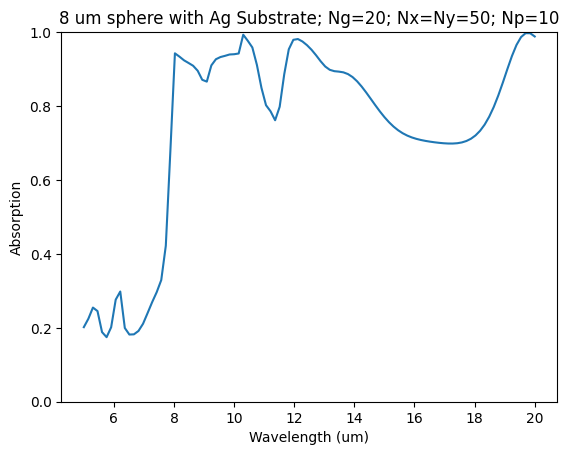

In [ ]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

(0.0, 1.0)

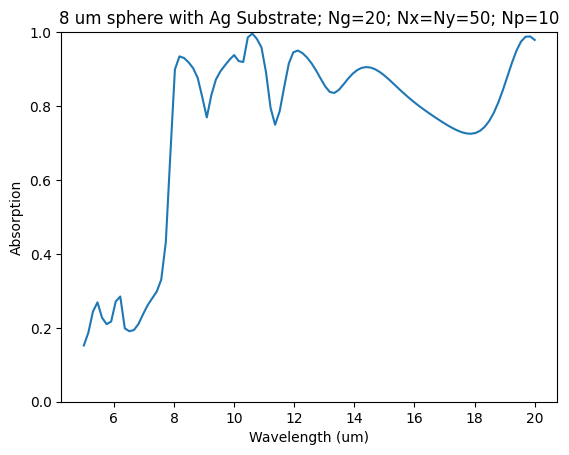

In [5]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Torch Inference

In [ ]:
from beads_torch import beads_torch
import torch
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0,'slab'), 
    ('sio2',8,'honeycomb'),
    ('sio2',13,'honeycomb'),
    ('ag',0.2,'slab'),
    ('ti',0.02,'slab'),
    ('si',0.75,'slab'),
    ('air',0.0,'slab') 
]

device = 'cuda'

diameter = 8 # um
wv_sweep = torch.linspace(5, 20, 100, device=device) + 0.000001

In [2]:
Rs, Ts, As = beads_torch(wv_sweep, device, nG=20, theta_start=0, theta_end=80, n_theta=20, 
                   theta_sweep=True, Nx=50, Ny=50, Np=10, structure=dev_structure,
                   diameter=diameter)

torch.Size([100, 1])
torch.Size([1, 20])
(50, 50, 10)
epgrid shape
torch.Size([100, 2500])
epgrid shape
torch.Size([100, 5000])
epgrid shape
torch.Size([100, 7500])
epgrid shape
torch.Size([100, 10000])
epgrid shape
torch.Size([100, 12500])
epgrid shape
torch.Size([100, 15000])
epgrid shape
torch.Size([100, 17500])
epgrid shape
torch.Size([100, 20000])
epgrid shape
torch.Size([100, 22500])
epgrid shape
torch.Size([100, 25000])
(50, 50, 10)
epgrid shape
torch.Size([100, 2500])
epgrid shape
torch.Size([100, 5000])
epgrid shape
torch.Size([100, 7500])
epgrid shape
torch.Size([100, 10000])
epgrid shape
torch.Size([100, 12500])
epgrid shape
torch.Size([100, 15000])
epgrid shape
torch.Size([100, 17500])
epgrid shape
torch.Size([100, 20000])
epgrid shape
torch.Size([100, 22500])
epgrid shape
torch.Size([100, 25000])


(0.0, 1.0)

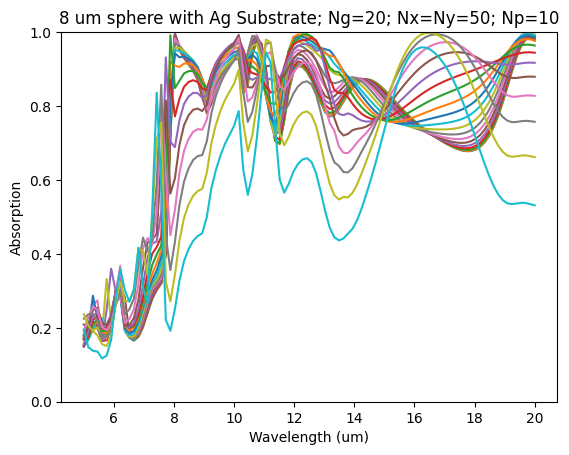

In [3]:
plt.plot(wv_sweep.cpu(), As.cpu())
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Autograd Optimization

In [3]:
from optimize import optimize
import autograd.numpy as np
from refractiveindex import RefractiveIndexMaterial
import grcwa

nm_to_um = 1e-3

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

# dev_structure = [
#     ('air',0.0*nm_to_um,'slab'),
#     (SiO2,230.0*nm_to_um,'slab'),
#     (HfO2,485.0*nm_to_um,'slab'),
#     (SiO2,688.0*nm_to_um,'slab'),
#     (HfO2,13.0*nm_to_um,'slab'),
#     (SiO2,73.0*nm_to_um,'slab'),
#     (HfO2,34.0*nm_to_um,'slab'),
#     (SiO2,54.0*nm_to_um,'slab'),
#     (Ag,200.0*nm_to_um,'slab'),
#     (Ti_2,20.0*nm_to_um,'slab'),
#     (Si,750.0*nm_to_um,'slab'),
#     ('air',0.0*nm_to_um,'slab')
# ]

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8,'honeycomb'), 
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 8 # um
wv_sweep = np.linspace(5, 20, num=100, endpoint=True) + 0.000001

grcwa.set_backend('autograd')

In [4]:
thicknesses = optimize(wv_sweep, nG=20, theta_start=0, theta_end=80, n_theta=20, 
                   theta_sweep=False, Nx=50, Ny=50, Np=10, structure=dev_structure,
                   diameter=diameter, weight=1e-3, epoch=10, print_every=100, plot=False)

Initial loss: 31.58115639506753
Epoch 0:  31.581156395067424
[0.         8.         0.19999999 0.02       0.75       0.        ]
Trained loss: 31.581156395066483


In [ ]:
plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (um)")
plt.ylabel("Absorption")
plt.title("8 um sphere with Ag Substrate; Ng=20; Nx=Ny=50; Np=10")
plt.ylim(0, 1)

# Pytorch Optimization

In [5]:
from optimize_torch import optimize_torch
from refractiveindex import RefractiveIndexMaterial
import torch

nm_to_um = 1e-3

""" dev_structure = [
    ('air',0.0,'slab'),
    (SiO2,0.5,'slab'),
    (Ag,0.2,'slab'),
    (Ti_2,0.02,'slab'),
    (Si,0.75,'slab'), 
    ('air',0.0,'slab')
] """

dev_structure = [
    ('air',0.0*nm_to_um,'slab'),
    # (SiO2,8,'honeycomb'),
    ('sio2',230.0*nm_to_um,'slab'),
    ('hfo2',485.0*nm_to_um,'slab'),
    ('sio2',688.0*nm_to_um,'slab'),
    ('hfo2',13.0*nm_to_um,'slab'),
    ('sio2',73.0*nm_to_um,'slab'),
    ('hfo2',34.0*nm_to_um,'slab'),
    ('sio2',54.0*nm_to_um,'slab'),
    ('ag',200.0*nm_to_um,'slab'),
    ('ti',20.0*nm_to_um,'slab'),
    ('si',750.0*nm_to_um,'slab'),
    ('air',0.0*nm_to_um,'slab')
]

dev_structure = [
    ('air',0.0,'slab'), 
    ('sio2',8,'honeycomb'), 
    ('ag',0.2,'slab'),
    ('ti',0.02,'slab'),
    ('si',0.75,'slab'),
    ('air',0.0,'slab') 
]

diameter = 8. # um
device = 'cuda'
wv_sweep = torch.linspace(5, 20, 100, device=device) + 0.000001

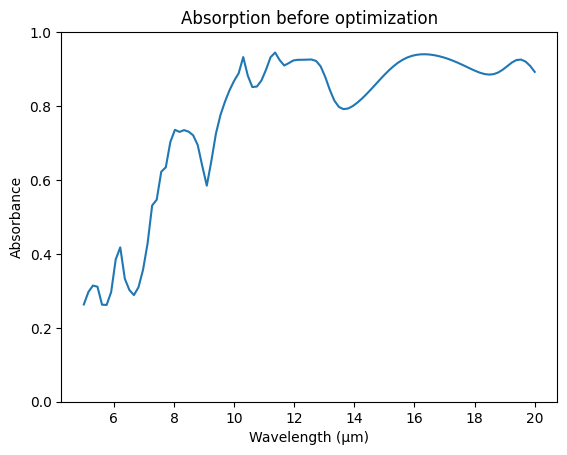

Initial loss: tensor(428.9534, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 0: Loss = 428.95337242624095
Thicknesses: [0.   8.   0.2  0.02 0.75 0.  ]
Diameter: 7.9856486
Epoch 1: Loss = 428.7479747338056
Thicknesses: [0.   8.   0.2  0.02 0.75 0.  ]
Diameter: 7.971374
Epoch 2: Loss = 428.54469958717715
Thicknesses: [0.         8.         0.19999999 0.01999999 0.75       0.        ]
Diameter: 7.9571657
Epoch 3: Loss = 428.34321762197715
Thicknesses: [0.         8.         0.19999997 0.01999999 0.75       0.        ]
Diameter: 7.9430103
Epoch 4: Loss = 428.1431385721839
Thicknesses: [0.         8.         0.19999996 0.01999999 0.75       0.        ]
Diameter: 7.928894
Epoch 5: Loss = 427.9440523694795
Thicknesses: [0.         8.         0.19999994 0.01999999 0.75       0.        ]
Diameter: 7.914802
Epoch 6: Loss = 427.745559657455
Thicknesses: [0.         8.         0.19999993 0.01999999 0.75       0.        ]
Diameter: 7.9007196
Epoch 7: Loss = 427.5472184721976
T

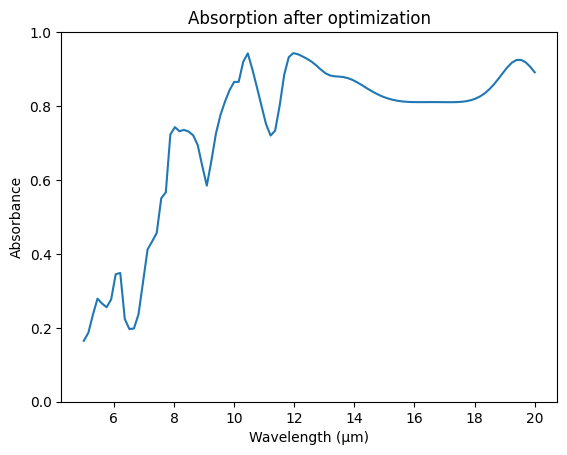

Final loss: tensor(389.7930, device='cuda:0', dtype=torch.float64, grad_fn=<AddBackward0>)


In [6]:
# thicknesses = optimize_torch(wv_sweep, device, nG=40, theta_start=0, theta_end=80, n_theta=10, 
#                    theta_sweep=True, Nx=50, Ny=50, Np=25, structure=dev_structure,
#                    diameter=diameter, weight=1e-3, epoch=10, print_every=100, plot=True)

thicknesses = optimize_torch(wv_sweep, device, nG=2, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=True, Nx=2, Ny=2, Np=25, structure=dev_structure,
                   diameter=diameter, weight=1e-3, epoch=100, print_every=1, plot=True)

# loss 9.5739

In [4]:
thicknesses

(array([0.        , 0.37598884, 0.        , 0.7694086 , 0.        ,
        0.15419844, 0.        , 0.13489766, 0.19997954, 0.01999817,
        0.75      , 0.        ], dtype=float32),
 None)

In [4]:
dev_structure

[('air', 0.0, 'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.23,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.485,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.6880000000000001,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.013000000000000001,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.073,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b8429ee0>,
  0.034,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281b84292b0>,
  0.054,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c5156630>,
  0.2,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c4dc6930>,
  0.02,
  'slab'),
 (<refractiveindex.refractiveindex.RefractiveIndexMaterial at 0x281c517

# Diameter Optimization Torch